In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aviralb13/git-codes/main/datas/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = df.iloc[:,1:2].values
Y = df.iloc[:,2].values

In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, Y) 

LinearRegression()

In [6]:
y_pred = reg.predict(X)

__Result of the linear regression model__

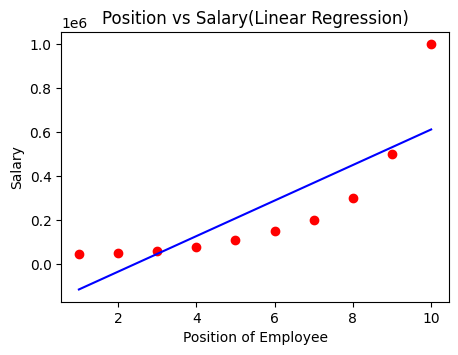

In [7]:
plt.figure(figsize=[5,3.5])
plt.scatter(X, Y, color = 'red')
plt.plot(X, y_pred, color = 'blue')

plt.title('Position vs Salary(Linear Regression)')
plt.xlabel('Position of Employee')
plt.ylabel('Salary')
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
x_poly = poly.fit_transform(X)
x_poly 

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

- X is the original values. 
- X_poly has three columns. 
  - The first column is the column of 1s for the constant. X containing real values is the middle column ie x1. The second column is square of x1.
- The fit must be included in a multiple linear regression model. 
- To do this, we have to create a new linear regression object lin_reg2 and this will be used to include the fit we made with the poly_reg object and our X_poly.

In [9]:
reg2 = LinearRegression()
reg2.fit(x_poly,Y) 

LinearRegression()

In [10]:
y_pred2 = reg2.predict(x_poly)
y_pred2

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

y = $\theta$ + $\theta$1 X + $\theta$2 X<sup>2</sup>

In [11]:
theta0 = reg2.intercept_
_, theta1, theta2 = reg2.coef_
print('{0} + {1}x + {2}x^2'.format(theta0, theta1, theta2))

232166.6666666664 + -132871.21212121213x + 19431.81818181819x^2


__Result of Polynomial Regression model__

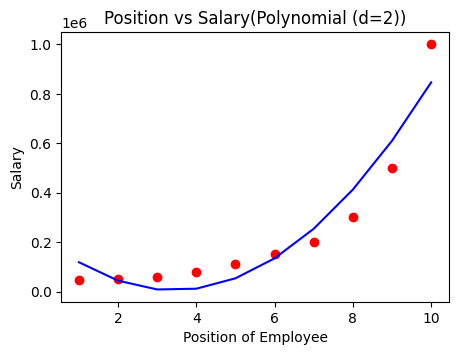

In [12]:
plt.figure(figsize=[5,3.5])
plt.scatter(X, Y, color = 'red')
plt.plot(X, y_pred2, color = 'blue')

plt.title('Position vs Salary(Polynomial (d=2))')
plt.xlabel('Position of Employee')
plt.ylabel('Salary')
plt.show()

In [13]:
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X)

reg3 = LinearRegression()
reg3.fit(X_poly3, Y)

LinearRegression()

In [14]:
y_pred3 = reg3.predict(X_poly3)
y_pred3

array([ 14902.09790211,  78759.90675991,  94960.37296037,  88223.77622378,
        83270.3962704 , 104820.51282052, 177594.40559441, 326312.35431236,
       575694.63869463, 950461.53846152])

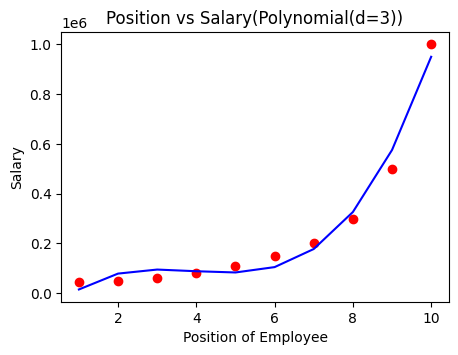

In [15]:
plt.figure(figsize=[5,3.5])
plt.scatter(X, Y, color = 'red')
plt.plot(X, y_pred3, color = 'blue')

plt.title('Position vs Salary(Polynomial(d=3))')
plt.xlabel('Position of Employee')
plt.ylabel('Salary')
plt.show()

__Predicting the result__

In [16]:
reg.predict([[4]])

array([128181.81818182])

In [17]:
reg2.predict(poly.fit_transform([[4]]))

array([11590.90909091])

In [18]:
reg3.predict(poly3.fit_transform([[4]]))

array([88223.77622378])

__Evaluation Metrics__

In [19]:
from sklearn.metrics import *
print(mean_absolute_error(Y, y_pred))
print(mean_absolute_error(Y, y_pred2))
print(mean_absolute_error(Y, y_pred3))

128454.54545454546
70218.1818181819
34790.20979020961


__Choose the best degree__

In [20]:
MAE_list=[]

for d in range(1,11):
    poly = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly.fit_transform(X)

    reg = LinearRegression()
    reg.fit(poly_features, Y)
    
    y_pred = reg.predict(poly_features)
    
    MAE = mean_absolute_error(Y, y_pred)
    MAE_list.append(MAE)

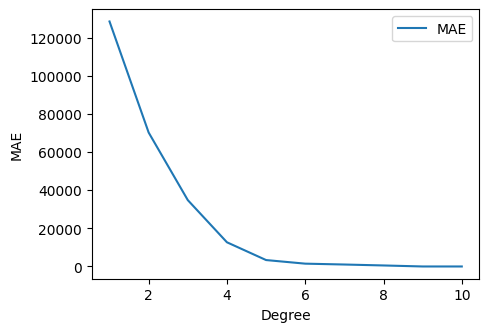

In [21]:
plt.figure(figsize=[5,3.5])
plt.plot(range(1,11), MAE_list, label='MAE')
plt.xlabel('Degree')
plt.ylabel('MAE')
plt.legend()